# 3. SVM et SMO

## Question 3.12

Expliqer le problème d’optimisation sous-jacent à un Support Vector Classifier?

Un Support Vector Classifier est une forme de SVM et par conséquent un algorithm d'apprentissage supervisé. Un Support Vector Classifier est un classifier lineair binaire non probabiliste, bien qu'il existe des méthodes afin de le rendre multiclasse, non-linéaire et de transformer son modèle non probabiliste en modèle probabiliste. Nous nous concentrerons sur l'étude des SVCs binaire non probabiliste linéaire et non linéraire.

### Explication littéral

###### Formulation du problème

Un SVC vise à séparer les différentes classes d'entrées par un hyperplan optimal. Cependant, il existe une myriade d'hyperplan réalisant une séparation correcte. Les points les plus proches de chaque côte d'un hyperplan sont appelés vecteurs supports. L'écart entre les vecteurs supports d'un hyperplan est appelé espace de séparation. 
Le but d'un SVC est donc de déterminer l'hyperplan optimal qui maximise l'espace de séparation entre les différentes classes d'entrées. Ce problème d'optimisation est illustré dans l'image ci-dessous.

![alt text](../img/supportVector.png "principe d'un SVC")


###### Astuce du noyau

En plus de réaliser des classifications linéaires, un SVC peut réaliser des classifications non-linéaire en utilisant une fonction noyau (dans l'image ci-dessous, représenté par le $\phi$) qui transforme les caractéristiques d'entrées d'un point dans des espaces de dimensions supérieurs. Cette méthode est appelée "Astuce du noyau".


![alt text](../img/kernel.png "Astuce du noyau")

### Explication mathématique

##### Hyperplan

Un hyperplan $L$ définit par :

$ L : w \cdot x + b = 0 $

$w$ est un vecteur de poid et est orthogonal à $L$, $x$ un point à $n$ caractéristiques et $b$ un biais.
$w$ et $x$ appartiennent à $R^n$

##### Distance d'un point par rapport à un hyperplan

On veut pouvoir calculer la distance d'un point $x$ par rapport à $L$:

Exemple dans $R^2$ :

Prenons un point $M$ appartenant à $L$

$distance(xm) = |xm| = |(x - m)\cdot w| = |(x_1 - m_1) * w_1 + (x_2 - m_2) * w_2| = |x_1 * w_1 + x_2 * w_2 - (m_1 * w_1 + m_2 * w_2)|$

puisque $M$ appartient à $L$, il vérifie à $m_1 * w_1 + m_2 * w_2 = -b$ alors

$|x_1 * w_1 + x_2 * w_2 - (m_1 * w_1 + m_2 * w_2)| = x \cdot w + b$



###### Règle de décision et vecteurs supports

Nos règles de décision pour savoir si un point appartient la classe $+$ ou $-$ :

$X_+$ : $w \cdot X_+ + b > 1$

$X_-$ : $w \cdot X_- + b < -1$

Pour un point appartenant(qui à permit de définir) un vecteur support :

$X_+$ : $w \cdot X_+ + b = 1$

$X_-$ : $w \cdot X_- + b = -1$

On peut les reformuler en une seul formule:

Soit $y = -1$  pour un point x appartenant à $X_-$ et $y = 1$ pour x appartenant à $X_+$ 

$y_i (w \cdot x_i + b) >= 1$

avec $i$, la classe du point $x$

###### Description de la marge

Pour calculer la marge $M$ (écart entre les deux vecteurs supports), il suffit de projeter le vecteur $X_+ - X_-$ sur le vecteur $w$:

$M = \frac{(X_+ - X_-) \cdot w}{||w||} $

On réutilisant les formules des vecteurs supports :

$(1) w \cdot X_+ = 1 - b$

$(2) w \cdot X_- = - (1 + b)$

On obtient

$(X_+ - X_-) \cdot w = 1 - b + 1 + b = 2 $

On réinjecte dans la formule:

$M = \frac{2}{||w||} $

###### Formulation du problème

Le but est de maximiser la marge donc de maximiser $\frac{2}{||w||} $
Sous contrainte que chaque points ne composant pas le vecteur support doit se situer à l'extérieur des vecteurs supports.

On peut reformuler ce problème sous forme de problème d'optimisation de la manière suivante

*forme primal:*

$min_w \frac{1}{2}||w||^2 $

$s.t :y^{(i)} (w \cdot x^{(i)} + b ) >= 1$, pour $i = 1,...,n$

où $n$ est le nombre de données d'entrainement, indexée par $i$

*forme dual:*

Pour qu'il y est une dualité forte, il est nécessaire que:

- le problème d'optimisation soit convexe

$min_w \frac{1}{2}||w||^2 $ est convexe par inégalité triangulaire et homogénéité positive

$y^{(i)} (w \cdot x^{(i)} + b )$ est l'intersection de sets convexes car chaque contrainte linéaire définit un sets convex, par conséquent $y^{(i)} (w \cdot x^{(i)} + b )$ définit un set convexe

- Les contraintes d'inégalités doivent être réalisable

Il existe donc une dualité forte entre le primal du problème d'optimisation précédement posé et son dual.

En utilisant la dualité de Lagrange

$L = \frac{1}{2} ||w||^2 - \sum{\alpha_i [y_i (w \cdot x_i + b) - 1]}$

$(i) \frac{dL}{dw} = w - \sum{\alpha_i y_i x_i} = 0$

$(ii) \frac{dL}{db} = \sum{\alpha_i y_i} = 0$

Par $(i)$ on déduit que $w = \sum{\alpha_i y_i x_i}$, on réinjecte dans $L$

$L = \frac{1}{2} (\sum{\alpha_i y_i x_i})(\sum{\alpha_j y_j x_j})  - \sum{\alpha_i y_i x_i\cdot (\sum{\alpha_j y_j x_j})} - \sum{\alpha_i y_i b} + \sum{\alpha_i}$

or d'après $ii$ : $\sum{\alpha_i y_i b} = b \sum{\alpha_i y_i} = b * 0 = 0$

On simplifie :

$L = \sum{\alpha_i} - \frac{1}{2} \sum_{i,j = 1}^n{\alpha_i \alpha_j y_i y_j x_i \cdot x_j}$

le problème est maintenant d'optimiser:

$\max_{\alpha} \sum{\alpha_i} - \frac{1}{2} \sum_{i,j = 1}^n{\alpha_i \alpha_j y_i y_j x_i \cdot x_j}$

$s.t : \sum{\alpha_i y_i} = 0$ et $0 <= \alpha_i < C, i = 1,..., n$

Lorsque l'on utilise une fonction kernel $\phi$ (c.f explication littéral - "astuce du noyau"), $x_i \cdot x_j$ est remplacé par $\phi(x_i) \cdot \phi(x_j)$


## Question 3.13

Implémenter la SMO. Laisser la possibilité de passer le noyau souhaité en argument

### Sequential Minimal Optimization: principes et étapes

Le principe du SMO est de reformuler le problème d'optimisation du dual du SVM en plusieurs sous problèmes d'optimisation en utilisant le théorème d'Osuna afin d'assurer la convergence. 

Les étapes de l'algorithme:

1. On choisit une paire d'alpha qui viole les conditions de KKT de manière heuristique. 
2. On optimise cette paire d'alpha
3. On répete (1) et (2) jusqu'a convergence


En effet, celon le théorème d'Osuna, si au moins un des deux multiplicateurs lagrangien violes les conditions de kkt alors chaque étape d'optimisation augmentera la fonction objectif.






### Sequential Minimal Optimization: implémentation

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Model:
    
    def __init__(self, X, y, C, kernel, alphas, b, errors, tol, eps, feat):
        self.X = X               # training data vector
        self.y = y               # class label vector
        self.C = C               # regularization parameter
        self.kernel = kernel     # kernel function
        self.alphas = alphas     # lagrange multiplier vector
        self.b = b               # scalar bias term
        self.errors = errors     # error cache
        self._obj = []           # record of objective function value
        self.m = len(self.X)     # store size of training set
        self.tol = tol           # tolerance
        self.eps = eps           # eps
        #self.w = np.mat(np.zeros(feat)).T #w

Fonction Objectif :

$\sum{\alpha_i} - \frac{1}{2} \sum_{i,j = 1}^n{\alpha_i \alpha_j y_i y_j x_i \cdot x_j}$

In [3]:
def objective_function(alphas, target, kernel, X_train):
    return np.sum(alphas) - 0.5 * np.sum((target[:, None] * target[None, :]) * kernel(X_train, X_train) * (alphas[:, None] * alphas[None, :]))

def decision_function(alphas, target, kernel, X_train, x_test, b):
    result = (alphas * target) @ kernel(X_train, x_test) - b
    return result

In [4]:
def plot_decision_boundary(model, ax, resolution=100, colors=('b', 'k', 'r'), levels=(-1, 0, 1)):        
        # Generate coordinate grid of shape [resolution x resolution]
        # and evaluate the model over the entire space
        xrange = np.linspace(model.X[:,0].min(), model.X[:,0].max(), resolution)
        yrange = np.linspace(model.X[:,1].min(), model.X[:,1].max(), resolution)
        grid = [[decision_function(model.alphas, model.y,
                                   model.kernel, model.X,
                                   np.array([xr, yr]), model.b) for xr in xrange] for yr in yrange]
        grid = np.array(grid).reshape(len(xrange), len(yrange))
        
        # Plot decision contours using grid and
        # make a scatter plot of training data
        ax.contour(xrange, yrange, grid, levels=levels, linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=colors)
        ax.scatter(model.X[:,0], model.X[:,1],
                   c=model.y, cmap=plt.cm.viridis, lw=0, alpha=0.25)
        
        # Plot support vectors (non-zero alphas)
        # as circled points (linewidth > 0)
        mask = np.round(model.alphas, decimals=2) != 0.0
        ax.scatter(model.X[mask,0], model.X[mask,1],
                   c=model.y[mask], cmap=plt.cm.viridis, lw=1, edgecolors='k')
        
        return grid, ax

In [5]:
#section 2.1 & 2.3
def take_step(i1, i2, model):
    #skip if same
    if i1 == i2:
        return 0, model
    
    #alphas
    a1 = model.alphas[i1]
    a2 = model.alphas[i2]
    #points
    x1 = model.X[i1]
    x2 = model.X[i2]
    #output classes
    y1 = model.y[i1]
    y2 = model.y[i2]
    #errors
    #if a1 > 0 and alpha1 < smo.C:
    E1 = model.errors[i1]
    #else:
    #    E1 = model.X[i1] * model.w + model.b - model.y[i1]
    E2 = model.errors[i2]
    #epsilon
    eps = model.eps
    s = y1 * y2
    C = model.C
    k = model.kernel

    if (y1 != y2):
        L = max(0, a2 - a1)
        H = min(C, C + a2 - a1)
    else:
        L = max(0, a2+ a1 - C)
        H = min(C, a2 + a1)
    
    if (L == H):
        return 0, model
    
    k11 = k(x1, x1)
    k12 = k(x1, x2)
    k22 = k(x2, x2)

    eta = k11 + k22 - 2 * k12
    
    if (eta > 0):
        na2 = a2 + y2 * (E1 - E2) / eta
        if (na2 < L):
            na2 = L
        elif (na2 > H):
            na2 = H
    else:
        alphas_copy = model.alphas.copy()
        alphas_copy[a2] = L
        Lobj = objective_function(alphas_copy, model.y, k, model.X)
        alphas_copy[a2] = H
        Hobj = objective_function(alphas_copy, model.y, k, model.X)
        if (Lobj < Hobj - eps):
            na2 = L
        elif (Lobj > Hobj + eps):
            na2 = H
        else:
            na2 = a2
    
    if ((na2 < 0 and na2 > -1.0) or (na2 > 0 and na2 < 1.0)):
        na2 = 0.0
    elif (a2 > C - 1e-8):
        na2 = C
    
    if (np.abs(na2 - a2) < eps * (na2 + a2 + eps)):
        return 0, model
    
    na1 = a1 + s * (a2 - na2)
    
    #update treshold
    old_b = model.b
    if 0 < a1 and a1 < C:
        model.b = E1 + y1 * (na1 - a1) * k11 + y2 * (na2 - a2) * k12 + model.b
    elif 0 < a2 and a2 < C:
        model.b = E2 + y1 * (na1 - a1) * k12 + y2 * (na2 - a2) * k22 + model.b
    else:
        b1 = E1 + y1 * (na1 - a1) * k11 + y2 * (na2 - a2) * k12 + model.b
        b2 = E2 + y1 * (na1 - a1) * k12 + y2 * (na2 - a2) * k22 + model.b
        model.b = (b1 + b2) * 0.5
    
    #update alphas
    model.alphas[i1] = na1
    model.alphas[i2] = na2
    
    
    model.w = model.X.T * np.multiply(model.alphas, model.y)
    
    for index, alph in zip([i1, i2], [na1, na2]):
        if 0.0 < alph < C:
            model.errors[index] = 0.0
    
    #change errors
    non_opt = [n for n in range(model.m) if (n != i1 and n != i2)]
    model.errors[non_opt] = model.errors[non_opt] + \
    y1*(na1 - a1) * k(model.X[i1], model.X[non_opt]) + \
    y2*(na2 - a2) * k(model.X[i2], model.X[non_opt]) + old_b - model.b
    
    
    return 1, model


In [6]:
#section2.2
"""
The second function chose the second heuristic in order to maximise the size the step of the optimisation
"""
def examine_example(i2, model):
    y2 = model.y[i2]
    alpha2 = model.alphas[i2]
    E2 = model.errors[i2]
    r2 = E2 * y2
    if ((r2 < - model.tol and alpha2 < model.C) or (r2 > model.tol and alpha2 > 0)):
        if (len(model.alphas[(model.alphas != 0) &(model.alphas != model.C)]) > 1):
            if model.errors[i2] > 0:
                i1 = np.argmin(model.errors)
            else:
                i1 = np.argmax(model.errors)
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
        for i in np.roll(np.where((model.alphas != 0) & (model.alphas != model.C))[0], np.random.choice(np.arange(model.m))):
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
        for i1 in np.roll(np.arange(model.m), np.random.choice(np.arange(model.m))):
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
    return 0, model
   

In [7]:
#section 2.2
"""
Train is the function that will chose the first heuristic.
It iterates over all the training set, determining wether each examples violates KKT conditions.
First, since all the datas are non-bound we just examine all of them.
On the second pass, we just pass over those which are non-bound (0 and C)
We iterate until every alphas obey KKT condition
"""
def train(model):
    numChanged = 0
    examineAll = False
    while(numChanged > 0 or not examineAll):
        numChanged = 0
        if (not examineAll):
            for i in range(0,model.m):
                examine_res, model = examine_example(i, model)
                numChanged += examine_res
        else:
            for i in range(0, model.m):
                if (model.alphas[i] == 0 or model.alphas[i] == model.C):
                    pass
                examine_res, model = examine_example(i, model)
                numChanged += examine_res
        if not examineAll :
            examineAll = True
        elif (numChanged == 0):
            examineAll = 1
    return model

In [8]:
def linear_kernel(x, y, b=1):
    return x @ y.T + b


def gaussian_kernel(x, y, sigma=1):    
    if np.ndim(x) == 1 and np.ndim(y) == 1:
        result = np.exp(- (np.linalg.norm(x - y, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(x) > 1 and np.ndim(y) == 1) or (np.ndim(x) == 1 and np.ndim(y) > 1):
        result = np.exp(- (np.linalg.norm(x - y, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(x) > 1 and np.ndim(y) > 1:
        result = np.exp(- (np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result



#### Some test to verify SMO

from: https://jonchar.net/notebooks/SVM/

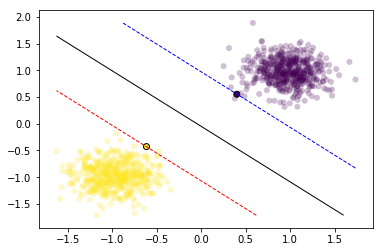

In [9]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

X_train, y = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=1)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)

y[y == 0] = -1
# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = Model(X_train_scaled, y, C, linear_kernel,
                 initial_alphas, initial_b, np.zeros(m), tol, eps, 2)

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

np.random.seed(0)
output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)

(500, 2)


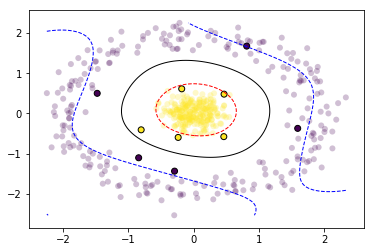

In [10]:
"""Gaussian"""

X_train, y = make_circles(n_samples=500, noise=0.1,
                          factor=0.1,
                          random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1


# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
print(X_train_scaled.shape)
model = Model(X_train_scaled, y, C, gaussian_kernel,
                 initial_alphas, initial_b, np.zeros(m), tol, eps, 2)

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error



output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)


In [12]:
X_train, y = make_moons(n_samples=500, noise=0.1,
                        random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1

# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
print(X_train_scaled.shape)
model = Model(X_train_scaled, y, C, (lambda x, y: gaussian_kernel(x, y, sigma=0.5)),initial_alphas, initial_b, np.zeros(m), tol, eps, 2)
              

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error



output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)

(500, 2)


## Question 3.14

Tester l’implémentation précédente sur le problème de classification proposé parle dataset **MNIST**. Dans le but de traiter un problème de classification binaire on se limite aurepérage d’un chiffre.Garder le noyau qui vous donne les meilleurs résultats suivant la métrique de votre choix.

#### Préparation du dataset

Changer les labels d'entrainement en : 1 pour le nombre que l'on souhaite detecté, -1.0 pour les autres

Préparer le Modèle

Lancer l'entrainement

Utiliser l'ensemble de test sur le Modèle et récuperer les prédictions

$accuracy = \frac{TP + TN}{m}$ with $m$ number of prediction

Matrice de confusion pour performance détaillé




In [13]:
import tensorflow as tf

def get_data():
    return tf.keras.datasets.mnist.load_data()

(x_train, y_train), (x_test, y_test) = get_data()


(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

#### Etapes


In [14]:
def adapt_dataset_to_nbr(nb, y_train):
    y_train = np.where(y_train == nb, 1.0, -1.0)
    print(y_train)
    return y_train

y_train = adapt_dataset_to_nbr(nb = 5, y_train = y_train)
y_train[(y_train == 1.0)].sum()

[ 1. -1. -1. ...  1. -1. -1.]


5421.0

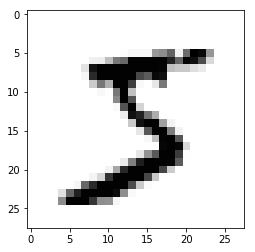

In [15]:
def plot_img(nb):
    plt.imshow(x_train.reshape(60000, 28, 28)[nb], cmap='Greys')
plot_img(0)

In [16]:
x_train = x_train.reshape(60000, 28 * 28)
#x_train.shape

In [17]:
#Scalling
#train_mean = x_train.mean(axis = 0)
#x_train_scaled = x_train - train_mean
#change type
x_train_scaled = x_train
x_train_scaled = x_train_scaled.astype(np.float32)
#x_train_scaled.dtype

In [18]:
def prepare_model(size):
    C = 1.0
    m = len(x_train_scaled[:size])
    initial_alphas = np.zeros(m)
    initial_b = 0.0
    feat = 28 * 28
    tol = 0.01 # error tolerance
    eps = 0.01 # alpha tolerance
    model = Model(x_train_scaled[:size], y_train[:size], C, linear_kernel,initial_alphas, initial_b, np.zeros(m), tol, eps, feat)
    # Initialize error cache
    initial_error = decision_function(model.alphas, model.y, model.kernel,
                                      model.X, model.X, model.b) - model.y
    model.errors = initial_error
    return model

In [19]:
model = prepare_model(10000)
output = train(model)

KeyboardInterrupt: 

In [20]:
#Number of support vector
model.alphas.sum()

0.0

Sadly, we did not manage to run our SMO with this dataset

But we would have test it this way :

In [ ]:
#y_pred = predict(model, x_test)

#metrics.confusion_matrix(y_true, y_pred)